In [1]:
# credentials
Consumer_Key = ""
Consumer_Secret = ""
Access_Token = ""
Access_Token_Secret = ""

In [2]:
import tweepy

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth)

# change it into code cell to install textblob
pip install textblob

In [7]:
import re 
from textblob import TextBlob 

In [30]:
def clean_tweet(tweet): 
    ''' function to clean tweet text by special characters. '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [31]:
def get_tweet_sentiment(tweet): 
    '''  function to classify sentiment of passed tweet using textblob's sentiment method '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [113]:
# if needed add more keywords
keywords = ["jobs","unemployement"]
tweets_two= []
for i in keywords:
    tweets_two.append(api.search(q = i, since = "2020-03-21", count=100))

In [115]:
tweets_two_1 = []
for i in range(len(keywords)):
    for tweet in tweets_two[i]:
        parsed_tweet = {}
        parsed_tweet['text'] = tweet.text
        parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text) 
        if tweet.retweet_count > 0: 
            if parsed_tweet not in tweets1: 
                tweets_two_1.append(parsed_tweet) 
        else: 
            tweets_two_1.append(parsed_tweet)

In [116]:
print(tweets_two_1)

[{'text': "RT @charliekirk11: House Democrats are collecting $174,000+ salaries while refusing to go to work\n\nTomorrow—they're going to approve proxy…", 'sentiment': 'neutral'}, {'text': "RT @charliekirk11: House Democrats are collecting $174,000+ salaries while refusing to go to work\n\nTomorrow—they're going to approve proxy…", 'sentiment': 'neutral'}, {'text': "RT @Mikko7for7: All ex-exos plus lay gain more fame through acting jobs so i'd say yes to actorson.", 'sentiment': 'positive'}, {'text': 'Sooo jobhunting this term is going to be rough. about 400 jobs (across all faculties/industries) for 7000 students -- let the games begin', 'sentiment': 'negative'}, {'text': '@DartmouthDerek ECEs are among the lowest paid professionals in the province.  Many of them are also struggling wit… https://t.co/sgu77Bahbo', 'sentiment': 'positive'}, {'text': "RT @charliekirk11: If Nancy Pelosi won't let her members show up to their jobs in Washington\n\n...Is she admitting that her House is Non-

In [117]:
ptweets1 = [tweet for tweet in tweets_two_1 if tweet['sentiment'] == 'positive'] 

# percentage of positive tweets 
p_per1 = 100*len(ptweets1)/len(tweets_two_1)
print("Positive tweets percentage: ",p_per1) 

Positive tweets percentage:  33.793103448275865


In [118]:
# picking negative tweets from tweets 
ntweets1 = [tweet for tweet in tweets_two_1 if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
n_per1 = 100*len(ntweets1)/len(tweets_two_1)
print("Negative tweets percentage: ",n_per1) 

Negative tweets percentage:  18.620689655172413


In [120]:
neu_tweets1 = [tweet for tweet in tweets_two_1 if tweet['sentiment'] == 'neutral'] 
# percentage of neutral tweets 
neu_per1 = 100*len(neu_tweets1)/len(tweets_two_1)
print("Neutral tweets percentage:  ",neu_per1) 

Neutral tweets percentage:   47.58620689655172


In [59]:
import matplotlib.pyplot as plt

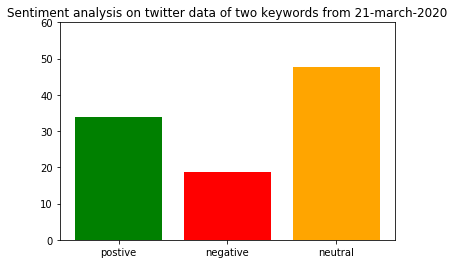

In [139]:
plt.title("Sentiment analysis on twitter data of two keywords from 21-march-2020")
plt.bar(["postive","negative","neutral"],[p_per1,n_per1,neu_per1], color = ["green","red","orange"])
plt.yticks(range(0,69,10))
plt.show()


In [129]:
# printing first 10 positive tweets
print("\n\nPositive tweets:") 
for tweet in ptweets1[:10]: 
    print(tweet['text']) 



Positive tweets:
RT @Mikko7for7: All ex-exos plus lay gain more fame through acting jobs so i'd say yes to actorson.
@DartmouthDerek ECEs are among the lowest paid professionals in the province.  Many of them are also struggling wit… https://t.co/sgu77Bahbo
RT @Orcusa1: Gretchen Whitmer has suspended the license of a 77 year old barber who didn't close his business during her controlling shutdo…
RT @thehill: Joe Biden: "We're in the middle of a pandemic that has cost us more than 85,000 jobs as of today. Lives of millions of people,…
RT @AndrewYang: Economists project that 42% of the jobs we are losing right now are gone for good. That’s 15 million jobs. That’s the size…
RT @thehill: Joe Biden: "We're in the middle of a pandemic that has cost us more than 85,000 jobs as of today. Lives of millions of people,…
RT @DrSuneilJain: We have now lost more jobs than the Great Depression. This should scare anyone more than a virus that spares 99% of us.
RT @rachelposer: Hard to watch as so ma

In [130]:
# printing first 10 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]:
    print(tweet['text']) 



Negative tweets:
@RepFredKeller @realDonaldTrump @newsmax And in the mean time corona deaths are heading towards 100k and unemployem… https://t.co/LMaLBgl9nh
@SerraldeMusic @NorcaL1979 Listen to your workforce, they are the base of your wealth, or you can do the immoral th… https://t.co/0lsJ6o1fyO
RT @Krishna60156649: @Anchorpriyanka_ madam  notice on jssc 
condidate  of ps  has suffered  unemployement due to completing their exam but…
@mommatotwo_ Also unemployement added 600$ a week. I dont make that much at my regular job. Unfortunately some peop… https://t.co/6sajJ3dV54
@Anchorpriyanka_ madam  notice on jssc 
condidate  of ps  has suffered  unemployement due to completing their exam… https://t.co/nMhCfJ2dqh
@lovers_don @TheCitizen_News I agree with the Lock down and the strategy. We are not going to die from unemployemen… https://t.co/ztlz9yHPy0
I have this very vague idea of moving to this one city in the south-east of this country. There’s not many things s… https://t.co/nRGo5R

In [132]:
# printing first 10 neutral tweets 
print("\n\nNeutral tweets:") 
for tweet in neu_tweets[:10]:
    print(tweet['text']) 



Neutral tweets:
DETR implements the federal Pandemic Emergency Unemployement Compensation PEUC extension of benefits, people will b… https://t.co/QtImft6eUF
corona Governor Wolf here in PA is actually holding back stimulus funds from whoever opens up their business  They… https://t.co/hEOF8Jaq6U
@realDonaldTrump Is the unemployement rate already above 30%? #TrumpGate #TrumpsJealousOfObama #TrumpIsAnIdiot 85.5… https://t.co/d08IS8WUys
@lexi4prez the fact that a trillionaire even exist shows how rotten the system is. the difference between a million… https://t.co/RNQCR0gWe6
RT @54and_counting: Dear @BorisJohnson, @RishiSunak has #ForgottenLTD directors are the back bone of the economy.
@Conservatives used to pu…
@RepCohen @CNN @maddow @NBCNews  @CBSNews @kathygriffin  @Rosie @MariahCarey @SpeakerPelosi still haven’t recieved… https://t.co/Ejh8Rsi0dz
RT @NBanicki: @GovHolcomb Do we know why it’s taking 6 weeks to get unemployement for people? Others have been getting paid since it begin